         Model Name  Training Error  Test Error  Training Time (s)
0   RandomForest-10        0.005862      0.1050           0.380743
1   RandomForest-30        0.000451      0.0900           1.074837
2  RandomForest-100        0.000000      0.0895           3.530303
3  RandomForest-300        0.000000      0.0890          11.190579
         Model Name  Training Error  Test Error  Training Time (s)
0  RandomForest-300             0.0       0.089          11.190579


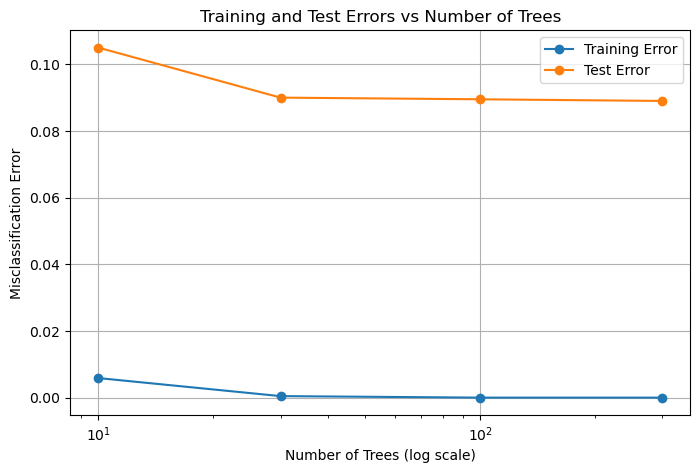

In [5]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Y = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Y.dat")
X = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\X.dat")
Y_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Ytest.dat")
X_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Xtest.dat")

tree_numbers = [10, 30, 100, 300]
model_names = []
train_error = []
test_error = []
times =[]

for k in tree_numbers:
    start_time = time.time()
    
    model = RandomForestClassifier(n_estimators=k, random_state=42)
    model.fit(X, Y)

    train_err = 1 - model.score(X,Y)
    test_err = 1 - model.score(X_test,Y_test)
    
    total_t = time.time() - start_time
   
    model_names.append(f"RandomForest-{k}")
    train_error.append(train_err)
    test_error.append(test_err)
    times.append(total_t)
    
results_df = pd.DataFrame({
    "Model Name": model_names,
    "Training Error": train_error,
    "Test Error": test_error,
    "Training Time (s)": times,
})

print(results_df)

min_test_error_index = test_error.index(min(test_error))
best_combination = {
    "Model Name": model_names[min_test_error_index],
    "Training Error": train_error[min_test_error_index],
    "Test Error": test_error[min_test_error_index],
    "Training Time (s)": times[min_test_error_index]
}
best_results_df = pd.DataFrame([best_combination])

print(best_results_df)

plt.figure(figsize=(8, 5))
plt.semilogx(tree_numbers, train_error, marker='o', label="Training Error")
plt.semilogx(tree_numbers, test_error, marker='o', label="Test Error")
plt.xlabel("Number of Trees (log scale)")
plt.ylabel("Misclassification Error")
plt.title("Training and Test Errors vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()
